In [1]:
import cn_utils
import Poetry

import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.rnn_layers import *
from cs231n.captioning_solver import CaptioningSolver
from cs231n.classifiers.rnn import CaptioningRNN
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url
%load_ext autoreload
%autoreload 2


In [2]:
poetries = cn_utils.readFile('./poetry')

word_to_idx, idx_to_word = cn_utils.get_idx_and_words(poetries)

#encodec_poetry = cn_utils.encodePoetry(poetries[0],word_to_idx)

#decoded_poetry = cn_utils.decodePoetry(encodec_poetry,idx_to_word)


all files:
['\xe6\xb8\xb8\xe5\xad\x90\xe5\x90\x9f.txt', '\xe8\x8d\x89.txt', '\xe5\x85\xb3\xe5\xb1\xb1\xe6\x9c\x88.txt', '\xe7\x99\xbb\xe9\xb9\xb3\xe9\x9b\x80\xe6\xa5\xbc.txt', '\xe7\x9b\xb8\xe6\x80\x9d.txt', '\xe7\xbb\x88\xe5\x8d\x97\xe6\x9c\x9b\xe4\xbd\x99\xe9\x9b\xaa.txt', '\xe7\x99\xbb\xe4\xb9\x90\xe6\xb8\xb8\xe5\x8e\x9f.txt', '\xe9\xb9\xbf\xe6\x9f\xb4.txt', '\xe9\x9d\x99\xe5\xa4\x9c\xe6\x80\x9d.txt', '\xe6\x9d\x82\xe8\xaf\x97.txt', '\xe5\xbc\xb9\xe7\x90\xb4.txt', '\xe5\x85\xab\xe9\x98\xb5\xe5\x9b\xbe.txt', '\xe6\xb1\x9f\xe9\x9b\xaa.txt', '\xe6\x98\xa5\xe6\x99\x93.txt']
reading file:  ./poetry/游子吟.txt
游子吟
stt慈母手中线，游子身上衣。临行密密缝，意恐迟迟归。谁言寸草心，报得三春晖。end
----- reading finished -----


reading file:  ./poetry/草.txt
草
stt离离原上草，一岁一枯荣。野火烧不尽。春风吹又生。远芳侵古道，晴翠接荒城。又送王孙去，萋萋满别情。end
----- reading finished -----


reading file:  ./poetry/关山月.txt
关山月
stt明月出天山，苍茫云海间。长风几万里，吹度玉门关。汉下白登道，胡窥青海湾。由来征战地，不见有人还。戍客望边色，思归多苦颜。高楼当此夜，叹息未应闲。end
----- reading finished -----


reading file:  ./poetry/登鹳雀楼.txt
登鹳雀楼
stt白日依山尽

In [3]:
encoded_poetries = []
for pt in poetries:
    encoded_poetries.append(cn_utils.encodePoetry(pt, word_to_idx))

In [4]:
import poetry_utils
data = {}
data = poetry_utils.generate_data(encoded_poetries, data)

Automatic pdb calling has been turned ON
(14, 20) (14, 100)
(Iteration 1 / 300) loss: 163.262402
(Iteration 11 / 300) loss: 107.459439
(Iteration 21 / 300) loss: 104.265842
(Iteration 31 / 300) loss: 73.257317
(Iteration 41 / 300) loss: 53.444630
(Iteration 51 / 300) loss: 38.891380
(Iteration 61 / 300) loss: 33.442325
(Iteration 71 / 300) loss: 29.399380
(Iteration 81 / 300) loss: 24.867379
(Iteration 91 / 300) loss: 26.225458
(Iteration 101 / 300) loss: 24.622332
(Iteration 111 / 300) loss: 23.119585
(Iteration 121 / 300) loss: 23.409248
(Iteration 131 / 300) loss: 25.856579
(Iteration 141 / 300) loss: 25.439280
(Iteration 151 / 300) loss: 33.682468
(Iteration 161 / 300) loss: 24.860526
(Iteration 171 / 300) loss: 27.526332
(Iteration 181 / 300) loss: 29.075721
(Iteration 191 / 300) loss: 29.168314
(Iteration 201 / 300) loss: 35.165456
(Iteration 211 / 300) loss: 27.903239
(Iteration 221 / 300) loss: 24.731540
(Iteration 231 / 300) loss: 24.737765
(Iteration 241 / 300) loss: 31.43855

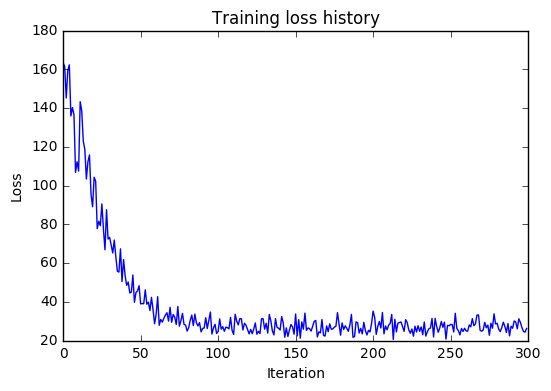

In [13]:
%pdb on
small_data = data
print data['train_features'].shape,data['train_captions'].shape
small_rnn_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=word_to_idx,
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
        )

small_rnn_solver = CaptioningSolver(small_rnn_model, small_data,
           update_rule='adam',
           num_epochs=300,
           batch_size=25,
           optim_config={
             'learning_rate': 5e-3,
           },
           lr_decay=0.95,
           verbose=True, print_every=10,
         )

small_rnn_solver.train()

# Plot the training losses
plt.plot(small_rnn_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [17]:
sample_captions = small_rnn_model.sample(data['train_features'],max_length=50)

In [18]:
first = cn_utils.decodeChinese(sample_captions[0], idx_to_word)
second = cn_utils.decodeChinese(sample_captions[1], idx_to_word)

In [19]:
print cn_utils.decodeChinese(data['train_features'][0].astype(int), idx_to_word), '\n', first
print cn_utils.decodeChinese(data['train_features'][1].astype(int), idx_to_word), '\n', second

游子吟blkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblk 
stt慈母手中线，游子身上衣。临行密密缝，意恐迟迟归。谁言寸草心，报得三春晖。endend望边色，思归多苦。end客
草blkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblk 
stt离离原上草，一一一枯荣。野火烧不尽。春风吹又生。远芳侵古道，晴翠接荒荒。又送王孙去，萋萋满别情。end


In [20]:
wuti = small_rnn_model.sample(np.ones((1,20)) * 0)

In [21]:
wuti_cn = cn_utils.decodeChinese(wuti[0], idx_to_word)

In [22]:
print wuti_cn

stt。endend白山，，黄海。。end千千目，，是是一上。endend望草，，思


In [40]:
import poetry_utils

In [73]:
wisdom = small_rnn_model.sample(poetry_utils.title_to_feature('功盖三分国，名成八阵图', word_to_idx))

In [74]:
print cn_utils.decodeChinese(wisdom[0], idx_to_word)

stt终南南秀，积雪浮云端。林表明霁色，城中增暮寒。endend寸草，，
